# 5주차 데이터 전처리
## Sklearn Preprocessing data
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

## Compare the effect of different scalers on data with outliers
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [8]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


In [9]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
import pandas as pd
df = pd.DataFrame(X_full, columns = dataset.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025192170408>,
      dtype=object)

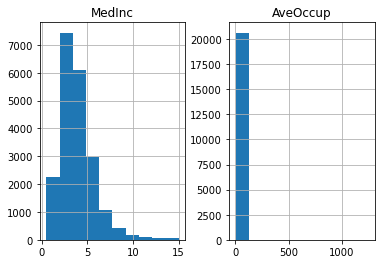

In [6]:
df[['MedInc', 'AveOccup']].hist()

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


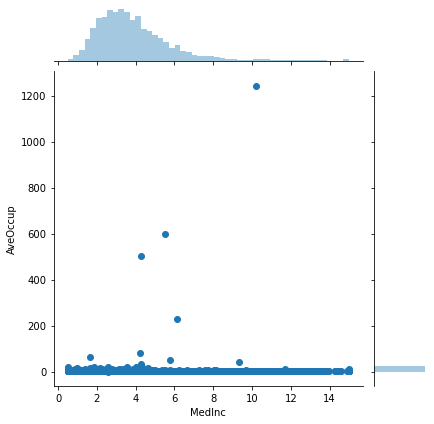

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
sns.jointplot('MedInc', 'AveOccup', data=df)

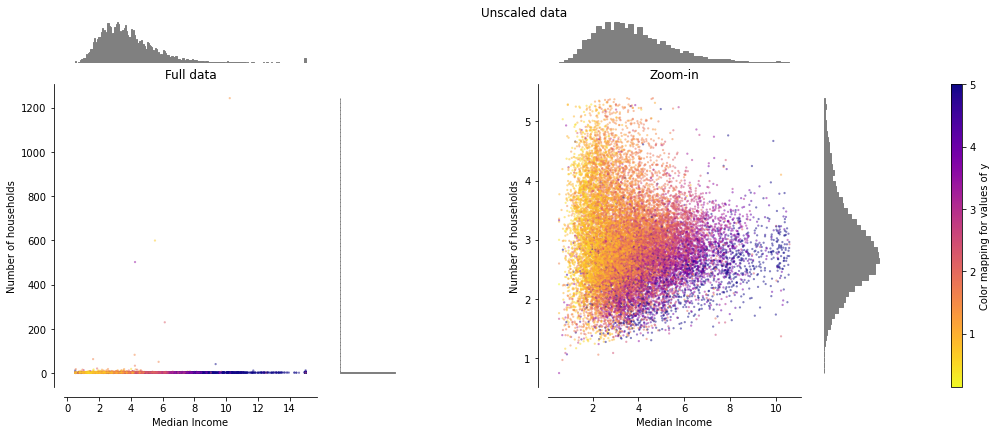

In [7]:
make_plot(0)

## 1. Data scaling
### 1.2. StandardScaler~~~~~~

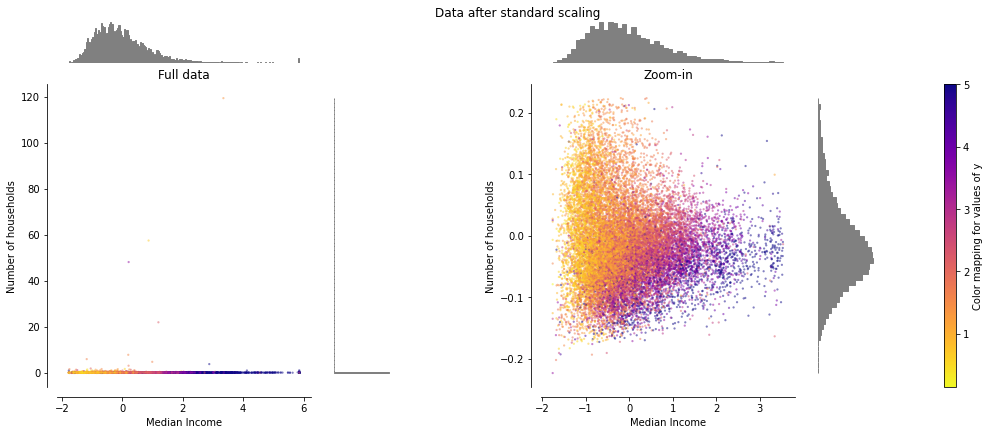

In [8]:
make_plot(1)

### 1.2. Maxmin~~~~~

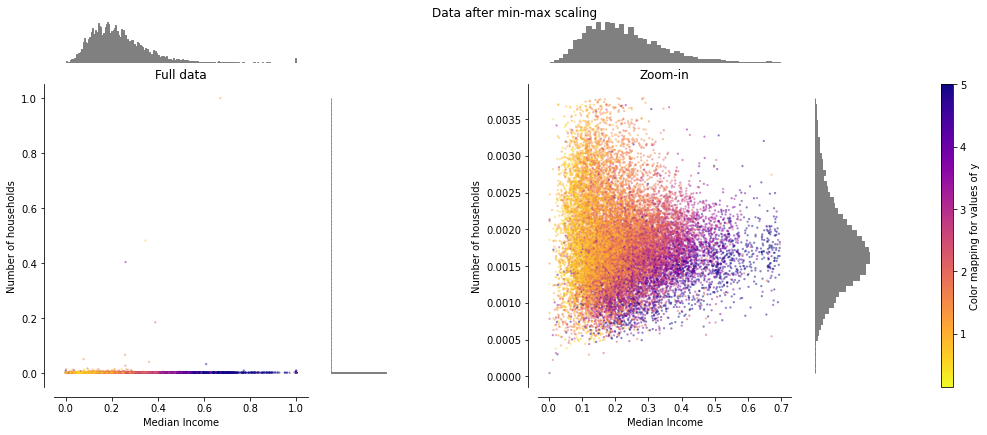

In [9]:
make_plot(2)

### 1.3.QuantileTransformer (Gaussian output)

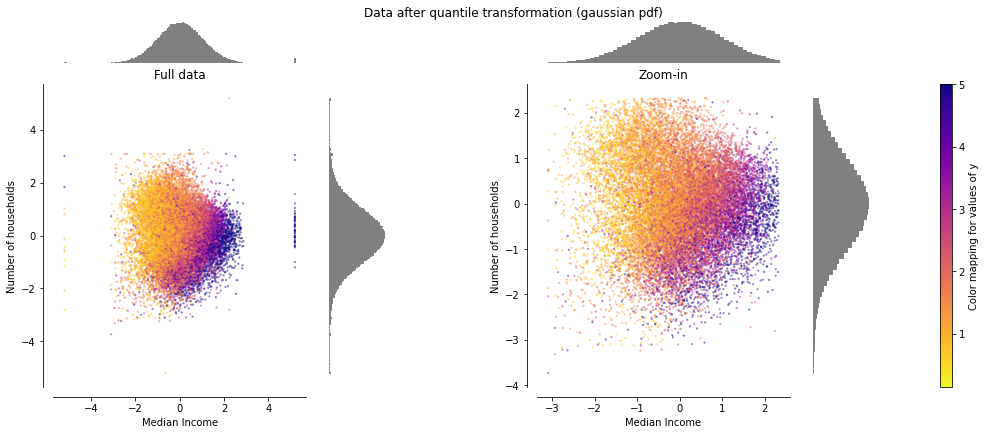

In [16]:
make_plot(8)

### 1.4. Normalizer

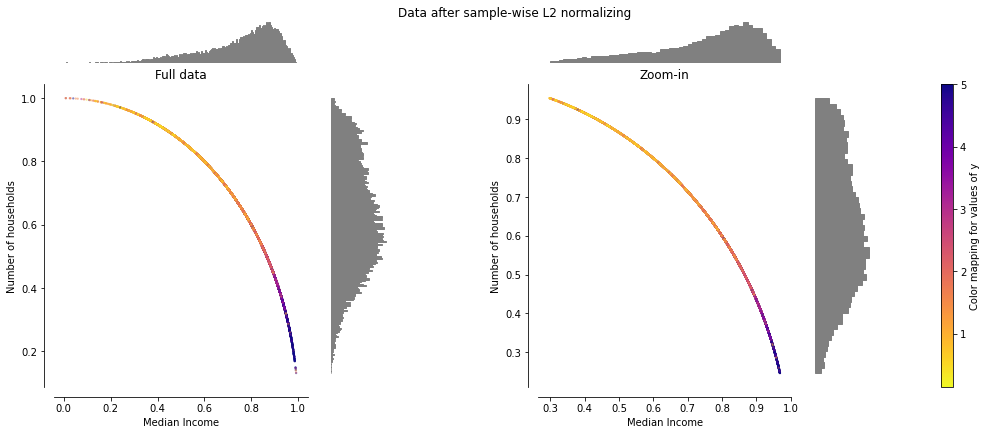

In [17]:
make_plot(9)

# 데이터전처리의 종류

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [11]:
from sklearn import preprocessing

## 1. Standardization, or mean removal and variance scaling
zero mean and unit variance.

In [24]:
X_train = pd.DataFrame(np.array([[2,3,11],[3,5,8], [4,7,5], [3,5,8]]))
X_train

,0,1,2
0,2,3,11
1,3,5,8
2,4,7,5
3,3,5,8


In [12]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
pd.DataFrame(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

,0,1,2
0,1.0,-1.0,2.0
1,2.0,0.0,0.0
2,0.0,1.0,-1.0


StandardScaler()

In [27]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [28]:
np.mean(X_train, 0)
scaler.mean_

0    3.0
1    5.0
2    8.0
dtype: float64

array([3., 5., 8.])

In [29]:
np.std(X_train, 0)
scaler.scale_

0    0.707107
1    1.414214
2    2.121320
dtype: float64

array([0.70710678, 1.41421356, 2.12132034])

In [30]:
X_scaled = scaler.transform(X_train)
pd.DataFrame(X_scaled)

,0,1,2
0,-1.414214,-1.414214,1.414214
1,0.000000,0.000000,0.000000
2,1.414214,1.414214,-1.414214
3,0.000000,0.000000,0.000000


In [17]:
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([0., 0., 0.])

array([1., 1., 1.])

### 다른 데이터는 fit를 다시 해야 한다.

In [21]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [22]:
scaler.transform(np.arange(9).reshape(3,3)).mean(0)
scaler.transform(np.arange(9).reshape(3,3)).std(0)

array([2.44948974, 4.89897949, 3.74165739])

array([3.        , 3.        , 1.96396101])

In [23]:
scaler.fit_transform(np.arange(9).reshape(3,3))
scaler.fit_transform(np.arange(9).reshape(3,3)).mean()
scaler.fit_transform(np.arange(9).reshape(3,3)).std()

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

2.4671622769447922e-17

1.0

### Dataframe에 적용시 (API 적용방식은 일관성이 있음, consistency)

In [24]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

df = pd.DataFrame(X_full, columns = dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
df.iloc[:,:-2].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-2])
df.iloc[:,:-2] = scaler.transform(df.iloc[:,:-2])

df

StandardScaler()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,37.88,-122.23
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,37.86,-122.22
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,37.85,-122.24
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,37.85,-122.25
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,39.48,-121.09
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,39.49,-121.21
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,39.43,-121.22
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,39.43,-121.32


## 2. Scaling features to a range
An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.
### MinMaxScale
### training data lies within the range [0, 1] 

In [27]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [28]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [24]:
min_max_scaler?

### Dataframe에 컬럼별로 적용시 (API 적용방식은 일관성이 있음, consistency)

In [29]:
df = pd.DataFrame(X_full, columns = dataset.feature_names)
df.head()
df.columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,37.88,-122.23
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,37.86,-122.22
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,37.85,-122.24
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,37.85,-122.25
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,37.85,-122.25


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [30]:
minmax = ['MedInc', 'AveBedrms']
stdscal = ['HouseAge', 'Population']

df.loc[:, minmax].head(2)
df.loc[:, stdscal].head(2)

,MedInc,AveBedrms
0,2.344766,-0.153758
1,2.332238,-0.263336


,HouseAge,Population
0,0.982143,-0.974429
1,-0.607019,0.861439


In [31]:
min_max_scaler.fit(df.loc[:, minmax])

MinMaxScaler()

In [32]:
min_max_scaler.transform(df.loc[:, minmax])

array([[0.53966842, 0.02046866],
       [0.53802706, 0.01892926],
       [0.46602805, 0.02194011],
       ...,
       [0.08276438, 0.0233229 ],
       [0.09429525, 0.02485928],
       [0.13025338, 0.02457305]])

In [33]:
df.loc[:, minmax] = min_max_scaler.fit_transform(df.loc[:, minmax])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.982143,0.628559,0.020469,-0.974429,-0.049597,37.88,-122.23
1,0.538027,-0.607019,0.327041,0.018929,0.861439,-0.092512,37.86,-122.22
2,0.466028,1.856182,1.155620,0.021940,-0.820777,-0.025843,37.85,-122.24
3,0.354699,1.856182,0.156966,0.021929,-0.766028,-0.050329,37.85,-122.25
4,0.230776,1.856182,0.344711,0.022166,-0.759847,-0.085616,37.85,-122.25


In [34]:
scaler.fit(df.loc[:, stdscal])
scaler.transform(df.loc[:, stdscal])
df.loc[:, stdscal] = scaler.transform(df.loc[:, stdscal])
df.head()

StandardScaler()

array([[ 0.98214266, -0.9744286 ],
       [-0.60701891,  0.86143887],
       [ 1.85618152, -0.82077735],
       ...,
       [-0.92485123, -0.3695372 ],
       [-0.84539315, -0.60442933],
       [-1.00430931, -0.03397701]])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.982143,0.628559,0.020469,-0.974429,-0.049597,37.88,-122.23
1,0.538027,-0.607019,0.327041,0.018929,0.861439,-0.092512,37.86,-122.22
2,0.466028,1.856182,1.155620,0.021940,-0.820777,-0.025843,37.85,-122.24
3,0.354699,1.856182,0.156966,0.021929,-0.766028,-0.050329,37.85,-122.25
4,0.230776,1.856182,0.344711,0.022166,-0.759847,-0.085616,37.85,-122.25


## MaxAbsScaler
### training data lies within the range [-1, 1] 

In [29]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs



X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

array([[-1.5, -1. ,  2. ]])

### Dataframe에 컬럼별로 적용시 (API 적용방식은 일관성이 있음, consistency)

In [30]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [31]:
X_test

array([[-3., -1.,  4.]])

In [32]:
max_abs_scaler.fit_transform(X_test)

array([[-1., -1.,  1.]])

In [33]:
scaler.fit_transform(df.loc[:, stdscal])

array([[ 0.98214266, -0.9744286 ],
       [-0.60701891,  0.86143887],
       [ 1.85618152, -0.82077735],
       ...,
       [-0.92485123, -0.3695372 ],
       [-0.84539315, -0.60442933],
       [-1.00430931, -0.03397701]])

In [34]:
scaler.fit_transform(df['HouseAge'].values.reshape(-1,1))

array([[ 0.98214266],
       [-0.60701891],
       [ 1.85618152],
       ...,
       [-0.92485123],
       [-0.84539315],
       [-1.00430931]])

## 3. Non-linear transformation

### QuantileTransformer(Mapping to a Uniform distribution)
provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train[0:10]
np.min(X_train[:,1])

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5]])

2.0

In [36]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_train_trans[0:10]

array([[0.54954955, 0.43693694, 0.48198198, 0.59009009],
       [0.50900901, 0.16216216, 0.42342342, 0.41441441],
       [0.85135135, 0.43693694, 0.80630631, 0.85135135],
       [0.06756757, 0.66666667, 0.04504505, 0.13513514],
       [0.87837838, 0.57657658, 0.71621622, 0.93243243],
       [0.17567568, 0.86936937, 0.27927928, 0.32432432],
       [0.31981982, 0.91441441, 0.1981982 , 0.13513514],
       [0.17567568, 0.        , 0.35135135, 0.35585586],
       [0.74324324, 0.43693694, 0.80630631, 0.7027027 ],
       [0.80630631, 0.74774775, 0.86486486, 1.        ]])

In [37]:
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([4.3, 5.1, 5.8, 6.5, 7.9])

It is also possible to map data to a normal distribution using QuantileTransformer by setting output_distribution='normal'. Using the iris dataset:

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

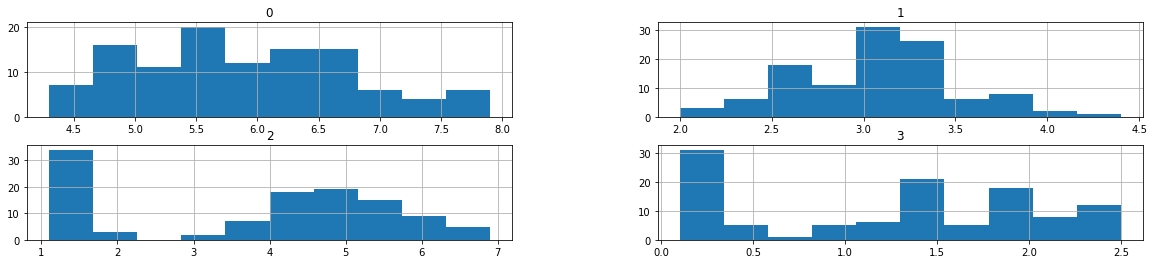

In [38]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X_train)
pd.DataFrame(quantile_transformer.quantiles_).hist(figsize=(20,4))

정규분포라 평균과 중앙값이 일치하게 된다. (3번쨰 컬럼은 scaling이후에도 정규화가 되지 않음)

In [39]:
pd.DataFrame(quantile_transformer.quantiles_).describe()
pd.DataFrame(quantile_transformer.quantiles_).median()

,0,1,2,3
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


0    5.80
1    3.00
2    4.25
3    1.30
dtype: float64

### PowerTransformer(Mapping to a Gaussian distribution)
- In many modeling scenarios, normality of the features in a dataset is desirable. 
- Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.
- PowerTransformer currently provides two such power transformations, the Yeo-Johnson transform and the Box-Cox transform.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

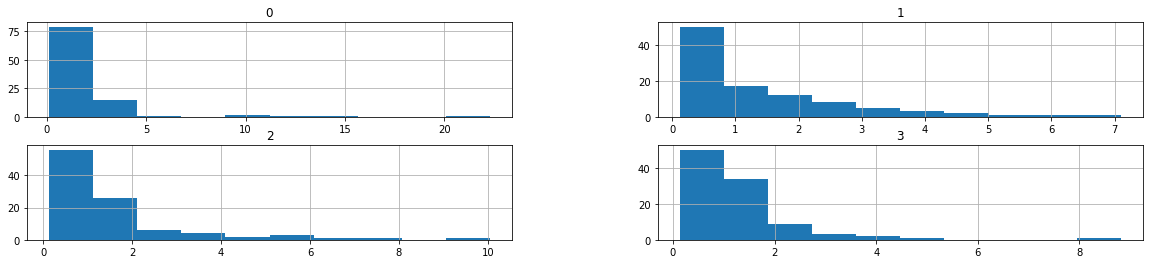

In [40]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(100, 4))
pd.DataFrame(X_lognormal).hist(figsize=(20,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

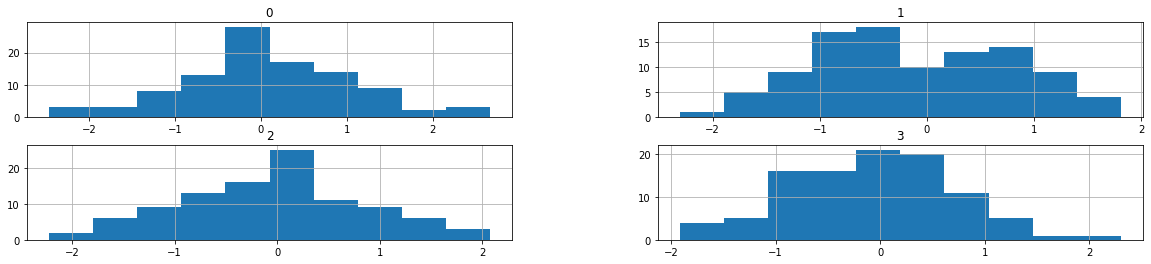

In [41]:
pd.DataFrame(pt.fit_transform(X_lognormal)).hist(figsize=(20,4))

While the above example sets the standardize option to False, PowerTransformer will apply zero-mean, unit-variance normalization to the transformed output by default.

#### This example demonstrates the use of the Box-Cox and Yeo-Johnson transforms through PowerTransformer to map data from various distributions to a normal distribution.
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

## 4. Normalization

- Normalization is the process of scaling individual samples to have unit norm. 
- This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

#### This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.
### The norm of a vector is square root of the sum of squares of the elements(컬럼벡터의 전체 유클리드거리 l2의 비율)

In [35]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [43]:
np.sqrt(1**2+2**2+1**2)
1/np.sqrt(1**2+2**2+1**2)

2.449489742783178

0.4082482904638631

## 5. Encoding categorical features

 K-bins discretization

In [45]:
df = pd.read_csv('../data/state-population.csv')
df

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [46]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df['ages'].values.reshape(-1,1))

enc.transform(df['ages'].values.reshape(-1,1))

OrdinalEncoder()

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

## 6. Discretization
각 컬럼을 bin의 개수를 [3,2,2] 개로 만들어 생성

In [47]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

## 7. Generating polynomial features

(x1,x2) --> (1, x1, x2, x1^2, x1*x2, x2^2)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[0, 1],
       [2, 3],
       [4, 5]])

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

(x1,x2) --> (1, x1, x2, x1*x2)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X)

array([[0, 1],
       [2, 3],
       [4, 5]])

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [50]:
X = np.arange(9).reshape(3, 3)
X
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

## 8. Custom transformers

In [51]:
from sklearn.preprocessing import FunctionTransformer

<font color='red'> np.log1p 함수는 (요소 단위로) 입력 array에 대해 자연로그 log(1 + x) 값을 반환

In [52]:
transformer = FunctionTransformer(np.log1p, validate=True)

In [53]:
X = np.array([[0, 1], [2, 3]])
X
transformer.transform(X)

array([[0, 1],
       [2, 3]])

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [54]:
transformer = FunctionTransformer(np.log, validate=True)
transformer.transform(X)

array([[      -inf, 0.        ],
       [0.69314718, 1.09861229]])

# END